# NLTK Chapter 11

## Managing Linguistic Data

*The html version of this chapter in the book is available [here](https://www.nltk.org/book/ch11.html "ch11").*

### 1   Corpus Structure: a Case Study

#### 1.1   The Structure of TIMIT

We can acces a sample from the TIMIT corpus thusly:

In [4]:
import nltk

from nltk.corpus import timit as TT

TT.fileids()[:8]

['dr1-fvmh0/sa1.phn',
 'dr1-fvmh0/sa1.txt',
 'dr1-fvmh0/sa1.wav',
 'dr1-fvmh0/sa1.wrd',
 'dr1-fvmh0/sa2.phn',
 'dr1-fvmh0/sa2.txt',
 'dr1-fvmh0/sa2.wav',
 'dr1-fvmh0/sa2.wrd']

Each filename has this internal structure:

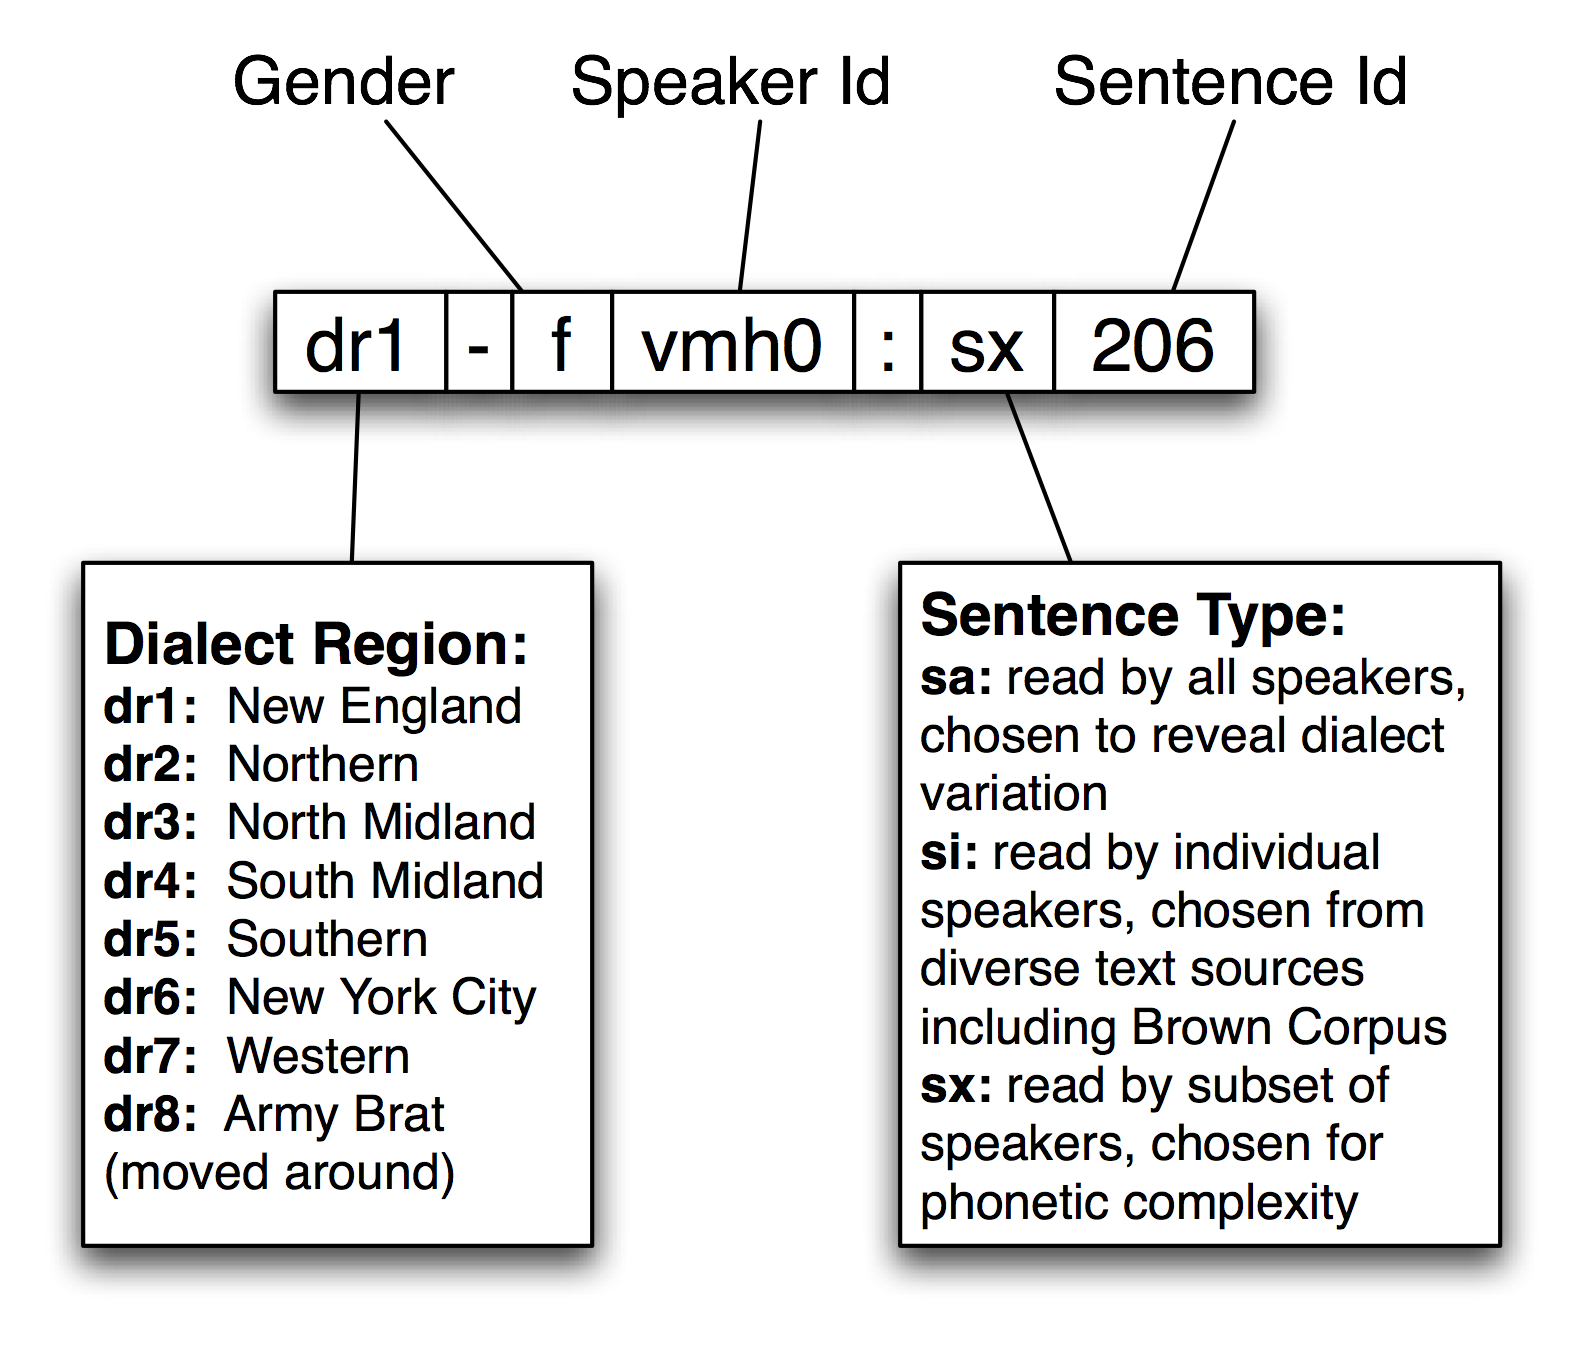

In [5]:
from IPython.display import display, Image

display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\timit.png"))

The (rather idiosyncratic) phonetic transcription can be accessed with `phones()`:

In [7]:
phonetic = TT.phones('dr1-fvmh0/sa1')
print(phonetic, end = ' ')

['h#', 'sh', 'iy', 'hv', 'ae', 'dcl', 'y', 'ix', 'dcl', 'd', 'aa', 'kcl', 's', 'ux', 'tcl', 'en', 'gcl', 'g', 'r', 'iy', 's', 'iy', 'w', 'aa', 'sh', 'epi', 'w', 'aa', 'dx', 'ax', 'q', 'ao', 'l', 'y', 'ih', 'ax', 'h#'] 

In [9]:
print(TT.word_times('dr1-fvmh0/sa1'), end = ' ')

[('she', 7812, 10610), ('had', 10610, 14496), ('your', 14496, 15791), ('dark', 15791, 20720), ('suit', 20720, 25647), ('in', 25647, 26906), ('greasy', 26906, 32668), ('wash', 32668, 37890), ('water', 38531, 42417), ('all', 43091, 46052), ('year', 46052, 50522)] 

For reference, there is a lexicon with the canonical pronunciation of every word:

In [10]:
timitdict = nltk.corpus.timit.transcription_dict()
timitdict['greasy'] + timitdict['wash'] + timitdict['water']

['g', 'r', 'iy1', 's', 'iy', 'w', 'ao1', 'sh', 'w', 'ao1', 't', 'axr']

In [11]:
phonetic[17:30]

['g', 'r', 'iy', 's', 'iy', 'w', 'aa', 'sh', 'epi', 'w', 'aa', 'dx', 'ax']

We also have access to demographic info on the speakers:

In [12]:
TT.spkrinfo('dr1-fvmh0')

SpeakerInfo(id='VMH0', sex='F', dr='1', use='TRN', recdate='03/11/86', birthdate='01/08/60', ht='5\'05"', race='WHT', edu='BS', comments='BEST NEW ENGLAND ACCENT SO FAR')

#### 1.2   Notable Design Features

*__Figure 1.2__: Structure of the Published TIMIT Corpus: The CD-ROM contains doc, train, and test directories at the top level; the train and test directories both have 8 sub-directories, one per dialect region; each of these contains further subdirectories, one per speaker; the contents of the directory for female speaker aks0 are listed, showing 10 wav files accompanied by a text transcription, a word-aligned transcription, and a phonetic transcription.*

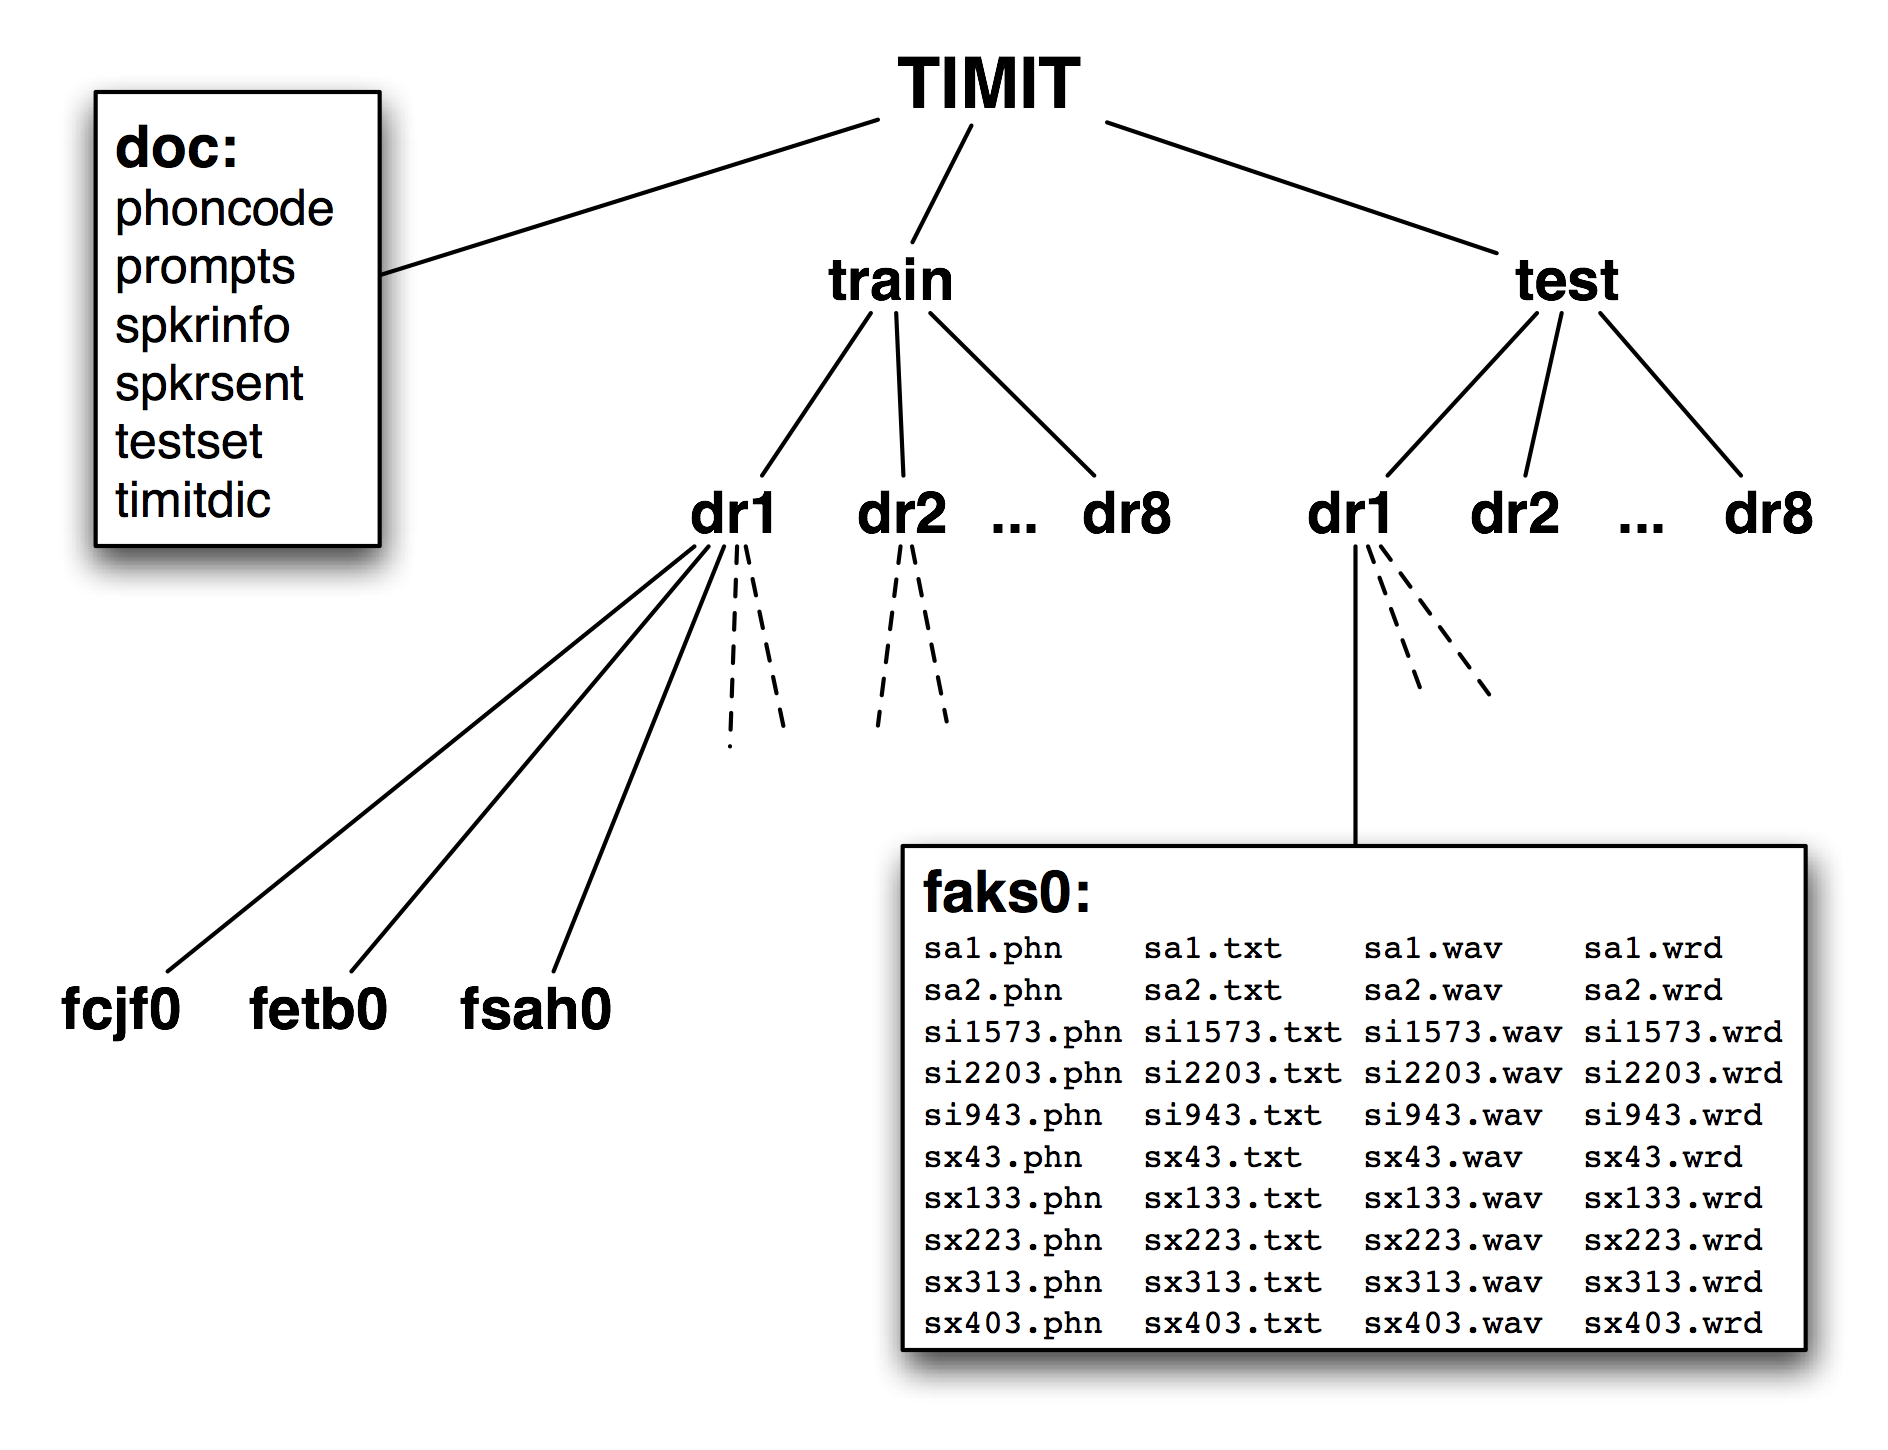

In [13]:
display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\timit-structure.png"))

#### 1.3   Fundamental Data Types

*__Figure 1.3__: Basic Linguistic Data Types — Lexicons and Texts: amid their diversity, lexicons have a record structure, while annotated texts have a temporal organization.*

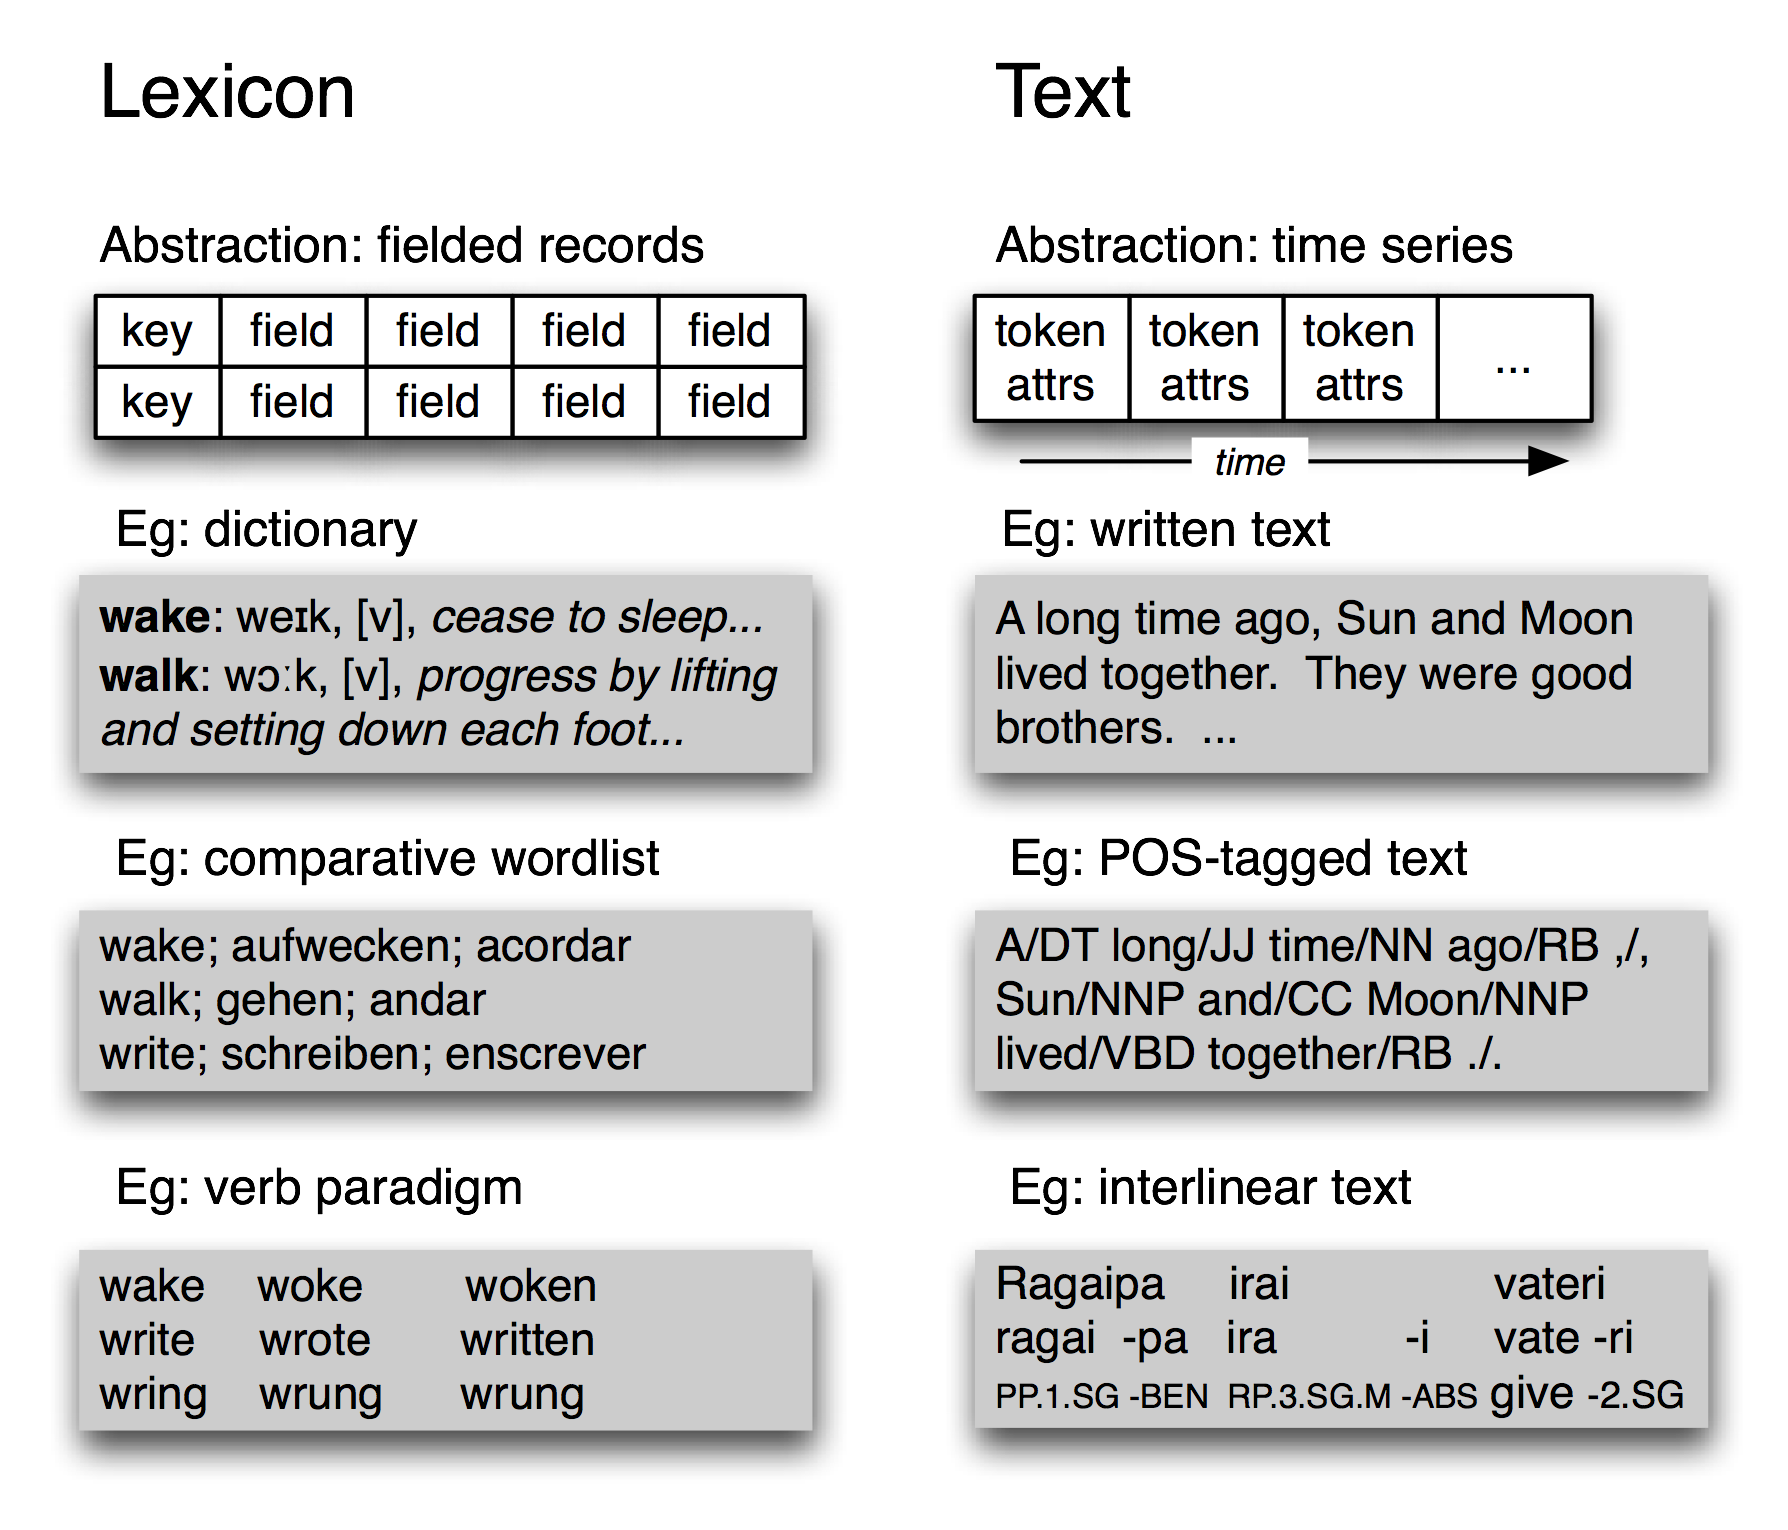

In [15]:
display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\datatypes.png"))

### 2   The Life-Cycle of a Corpus

#### 2.1 Three Corpus Creation Scenarios

*__No notes.__*

#### 2.2 Quality Control 

*__Figure 2.1__: Three Segmentations of a Sequence: The small rectangles represent characters, words, sentences, in short, any sequence which might be divided into linguistic units; $S_1$ and $S_2$ are in close agreement, but both differ significantly from $S_3$.*




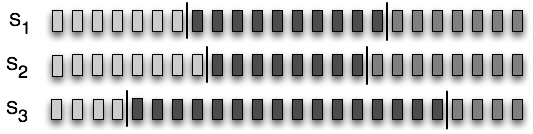

In [16]:
display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\windowdiff.png"))

We can use `windowdiff` to measure similarity.  The last argument is the window size, which can be modified to control the sensitivity of the measure:

In [17]:
s1 = "00000010000000001000000"
s2 = "00000001000000010000000"
s3 = "00010000000000000001000"
nltk.windowdiff(s1, s1, 3)

0.0

In [18]:
nltk.windowdiff(s1, s2, 3)

0.19047619047619047

In [25]:
nltk.windowdiff(s2, s3, 3)

0.5714285714285714

*Here's a plot showing how sensitivity varies by window size.  There's no clear pattern here.*

In [27]:
%matplotlib inline

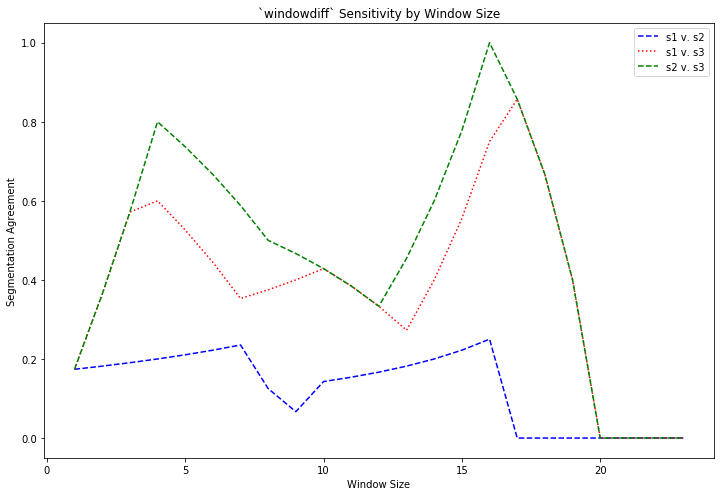

In [47]:
import matplotlib.pyplot as plt

X = range(1, 24)

s1_s2 = [nltk.windowdiff(s1, s2, i) for i in X]
s1_s3 = [nltk.windowdiff(s1, s3, i) for i in X]
s2_s3 = [nltk.windowdiff(s2, s3, i) for i in X]

plt.figure(figsize = (12, 8))
plt.plot(X, s1_s2, 'b--', label = 's1 v. s2')
plt.plot(X, s1_s3, 'r:', label = 's1 v. s3')
plt.plot(X, s2_s3, 'g--', label = 's2 v. s3')
plt.title("`windowdiff` Sensitivity by Window Size")
plt.xlabel('Window Size')
plt.ylabel('Segmentation Agreement')
plt.legend()
plt.show()

#### 2.3   Curation vs Evolution

*__Figure 2.2__: Evolution of a Corpus over Time: After a corpus is published, research groups will use it independently, selecting and enriching different pieces; later research that seeks to integrate separate annotations confronts the difficult challenge of aligning the annotations.*

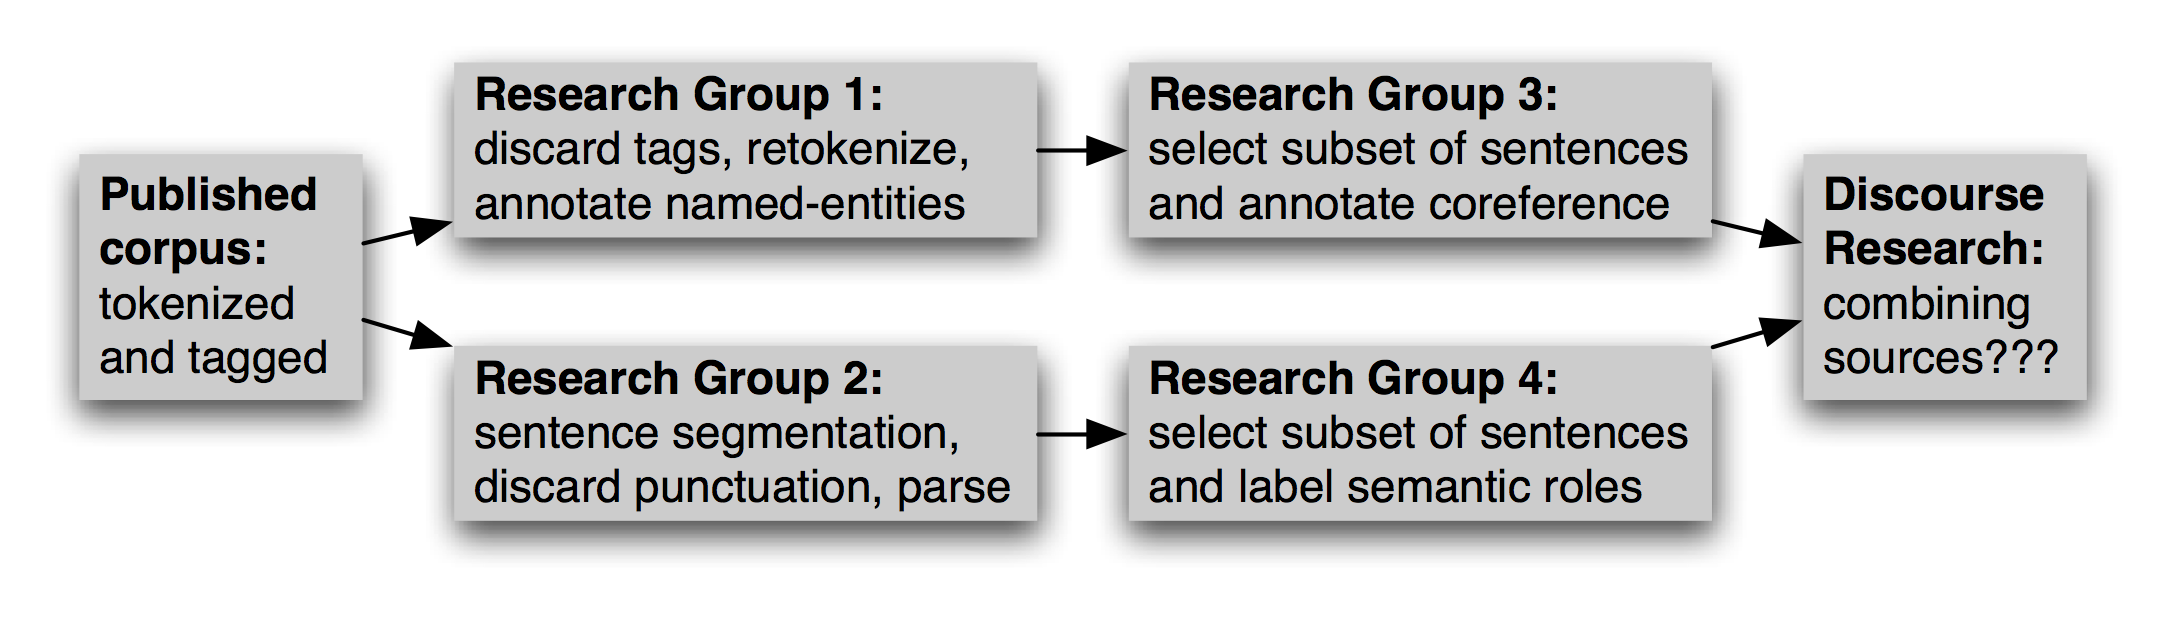

In [48]:
display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\evolution.png"))

### 3   Acquiring Data

#### 3.1   Obtaining Data from the Web

*__No notes__*

#### 3.2   Obtaining Data from Word Processor Files

Many corpora are created with word processors. While word processors have macro functions, they aren't sophisticated enough to handle searching for sets of classes.  However, if we convert the file to HTML, we can inspect the resulting file.

```
<p class=MsoNormal>sleep
  <span style='mso-spacerun:yes'> </span>
  [<span class=SpellE>sli:p</span>]
  <span style='mso-spacerun:yes'> </span>
  <b><span style='font-size:11.0pt'>v.i.</span></b>
  <span style='mso-spacerun:yes'> </span>
  <i>a condition of body and mind ...<o:p></o:p></i>
</p>
```

*__N.B.__: I cut and paste this text and saved it in a file named `dict.htm`.  Converting a text in the current version of MSWord to HTML produces something much, much different.*


If we know that the part-of-speech field is saved in 11-point font, we could look for text inside a `<span
style='font-size:11.0pt'>` element.  

In [51]:
import os, re

path = 'C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk'

os.chdir(path)

In [53]:
legal_pos = set(['n', 'v.t', 'v.i', 'adj', 'det'])
pattern = re.compile(r"'font-size:11.0pt'>([a-z.]+)<")
document = open("dict.htm", encoding = "windows-1252").read()
used_pos = set(re.findall(pattern, document))
illegal_pos = used_pos.difference(legal_pos)
print(list(illegal_pos))

['v.i.']


The code below strips out HTML markup and extracts the words and their pronunciations into CSV.  I changed the code in the second cell slightly - without the changes the CSV file would not change, and we could not look at that resulting file:

In [54]:
from bs4 import BeautifulSoup

def lexical_data(html_file, encoding = 'utf-8'):
    SEP = '_ENTRY'
    html = open(html_file, encoding = encoding).read()
    html = re.sub(r'<p', SEP + '<p', html)
    text = BeautifulSoup(html, 'html.parser').get_text()
    text = ' '.join(text.split())
    for entry in text.split(SEP):
        if entry.count(' ') > 2:
            yield entry.split(' ', 3)

In [62]:
import csv

df = open("dict1.csv", "w", encoding = 'utf-8')
writer = csv.writer(df)
writer.writerows(lexical_data("dict.htm", encoding = 'windows-1252'))
df.close()

#### 3.3   Obtaining Data from Spreadsheets and Databases

Using text from the book to create `dict.csv`, and carrying out the query laid out in the book: *select all words that appear in example sentences for which no dictionary entry is provided.*

In [64]:
import csv
lexicon = csv.reader(open('dict.csv'))
pairs = [(lexeme, defn) for (lexeme, _, _, defn) in lexicon]
lexemes, defns = zip(*pairs)
defn_words = set(w for defn in defns for w in defn.split())
print(sorted(defn_words.difference(lexemes)), end = ' ')

['...', 'a', 'and', 'body', 'by', 'cease', 'condition', 'down', 'each', 'foot', 'lifting', 'mind', 'of', 'progress', 'setting', 'to'] 

#### 3.4   Converting Data Formats

Here is code mapping the words in the dictionary definitions (cf. above) to their definitions:

In [65]:
idx = nltk.Index((defn_word, lexeme)
                for (lexeme, defn) in pairs
                for defn_word in nltk.word_tokenize(defn)
                if len(defn_word) > 3)
            

In [66]:
with open("dict.idx", "w") as idx_file:
    for word in sorted(idx):
        idx_words = ', '.join(idx[word])
        idx_line = "{}: {}".format(word, idx_words)
        print(idx_line, file = idx_file)

Here is the resulting `dict.idx` file:

```
body: sleep
cease: wake
condition: sleep
down: walk
each: walk
foot: walk
lifting: walk
mind: sleep
progress: walk
setting: walk
sleep: wake
```

#### 3.5   Deciding Which Layers of Annotation to Include

Commonly provided annotation layers:


* Word Tokenization: The orthographic form of text does not unambiguously identify its tokens. A tokenized and normalized version, in addition to the conventional orthographic version, may be a very convenient resource.
* Sentence Segmentation: As we saw in [3](https://www.nltk.org/book/ch03.html#chap-words), sentence segmentation can be more difficult than it seems. Some corpora therefore use explicit annotations to mark sentence segmentation.
* Paragraph Segmentation: Paragraphs and other structural elements (headings, chapters, etc.) may be explicitly annotated.
* Part of Speech: The syntactic category of each word in a document.
* Syntactic Structure: A tree structure showing the constituent structure of a sentence.
* Shallow Semantics: Named entity and coreference annotations, semantic role labels.
* Dialogue and Discourse: dialogue act tags, rhetorical structure


#### 3.6   Standards and Tools

*__Figure 3.2__: A Common Format vs A Common Interface*



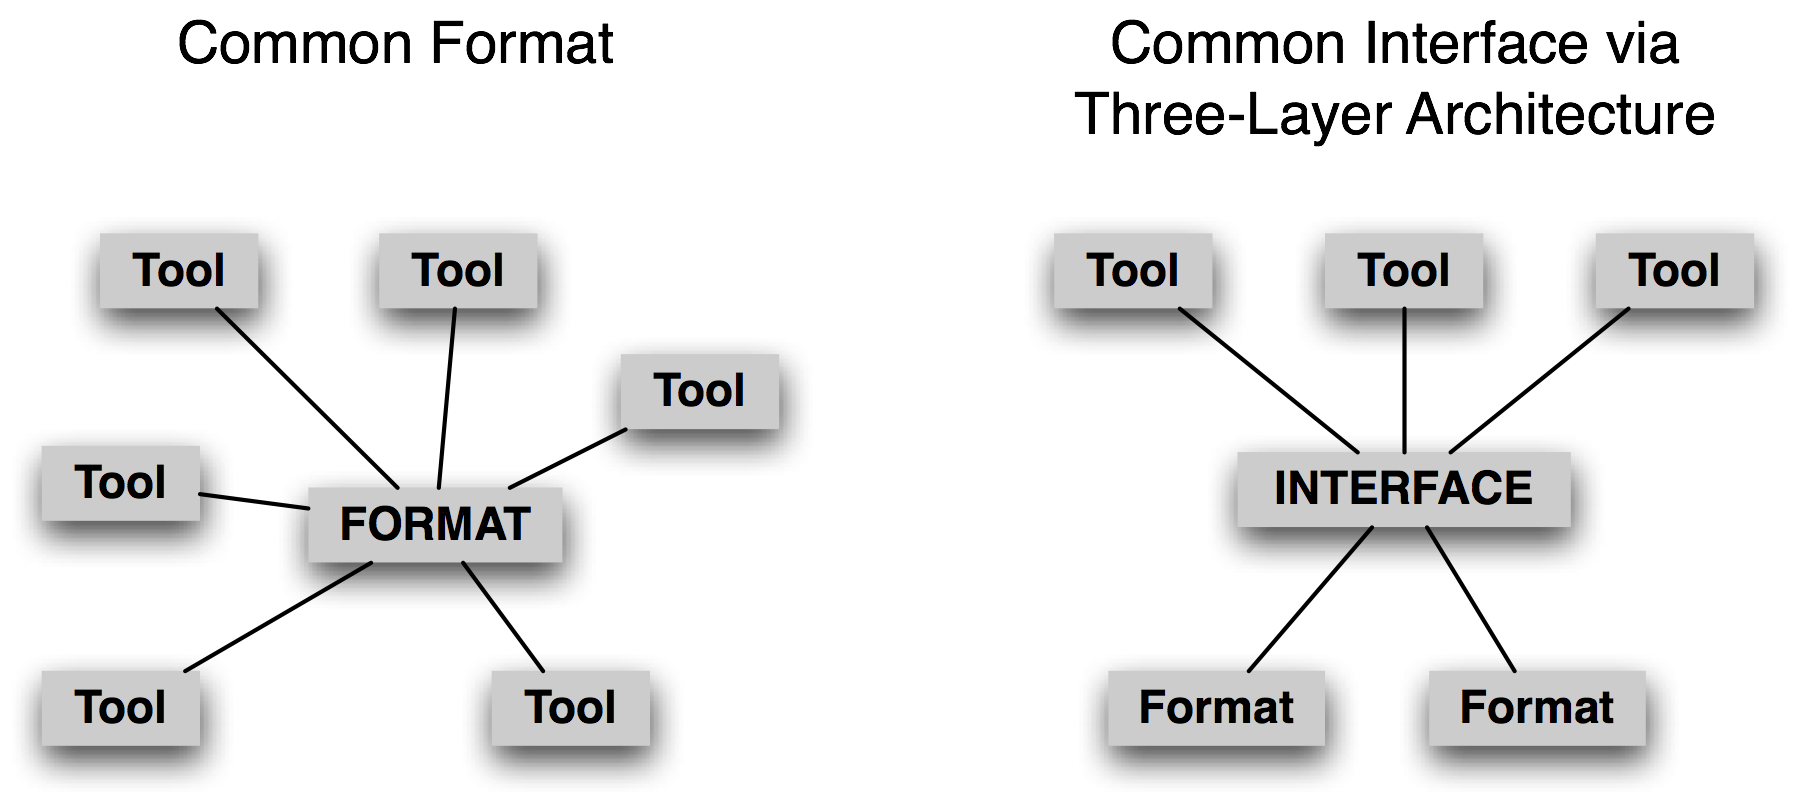

In [67]:
display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\three-layer-arch.png"))

#### 3.7   Special Considerations when Working with Endangered Languages

One problem with endangered languages is that there may not be an established orthography. Here's a program that permits lookup by pronunciation similarity.  It identifies confusible letter sequences and maps complex versions to simpler versions.

In [78]:
mappings = [('ph', 'f'), ('ght', 't'), ('^kn', 'n'), ('qu', 'kw'),
            ('[aeiou]+', 'a'), (r'(.)\1', r'\1')]

def signature(word):
    for patt, repl in mappings:
        word = re.sub(patt, repl, word)
    pieces = re.findall('[^aeiou]+', word)
    return ''.join(char for piece in pieces for char in sorted(piece))[:8]

In [71]:
signature('illefent')

'llfnt'

In [72]:
signature('ebsekwieous')

'bskws'

In [79]:
signature('nuculerr')

'nclr'

Now we can create a mapping from signatures to words so that we can create candidate corrections for a given input:

In [74]:
signatures = nltk.Index((signature(w), w) for w in nltk.corpus.words.words())

In [80]:
signatures[signature('nuculerr')]

['anicular', 'inocular', 'nuclear', 'unicolor', 'uniocular', 'unocular']

Next we can rank the results by their similarity with the original word:

In [81]:
def rank(word, wordlist):
    ranked = sorted((nltk.edit_distance(word, w), w) for w in wordlist)
    return [word for(_, word) in ranked]

def fuzzy_spell(word):
    sig = signature(word)
    if sig in signatures:
        return rank(word, signatures[sig])
    else:
        return []

In [82]:
fuzzy_spell('illefent')

['olefiant', 'elephant', 'oliphant', 'elephanta']

In [83]:
fuzzy_spell('ebsekwieous')

['obsequious']

In [84]:
fuzzy_spell('nucular')

['anicular', 'inocular', 'nuclear', 'unocular', 'uniocular', 'unicolor']

### 4   Working with XML

#### 4.1   Using XML for Linguistic Structures

Simple lexical entry in XML:

```
<entry>
  <headword>whale</headword>
  <pos>noun</pos>
  <gloss>any of the larger cetacean mammals having a streamlined
    body and breathing through a blowhole on the head</gloss>
</entry>

```

Here is a entry with links to WordNet via the `<synset>` tags:

```
<entry>
  <headword>whale</headword>
  <pos>noun</pos>
  <sense>
    <gloss>any of the larger cetacean mammals having a streamlined
      body and breathing through a blowhole on the head</gloss>
    <synset>whale.n.02</synset>
  </sense>
  <sense>
    <gloss>a very large person; impressive in size or qualities</gloss>
    <synset>giant.n.04</synset>
  </sense>
</entry>
```

Another way to do the same would be with __XML attributes__:

```
<entry>
  <headword>whale</headword>
  <pos>noun</pos>
  <gloss synset="whale.n.02">any of the larger cetacean mammals having
      a streamlined body and breathing through a blowhole on the head</gloss>
  <gloss synset="giant.n.04">a very large person; impressive in size or
      qualities</gloss>
</entry>

```

#### 4.2   The Role of XML

